In [1]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
import lib
import random

# todo:
# pie chart for cls distr
# bar charts for 1) per class metrics (precision/recall/F1); 2) comparing effectivenss of processing
# confusion matrix

## Optional Exercise: Add bigram capabilities to the classifier!

So far our Naive Bayes classifier scores an Average F1 score of 66.9% on the test set.
Let's see if we can improve on that by incorporating bigrams!


In [97]:
def add_bigrams(tweet):
    # Currently, tweet has an attribute called tweet.tokenList which is a list of tokens.
    # You want to add a new attribute to tweet called tweet.bigramList which is a list of bigrams.
    # Each bigram should be a pair of strings. You can define the bigram like this: bigram = (token1, token2).
    # In Python, this is called a tuple. You can read more about tuples here: https://www.programiz.com/python-programming/tuple

    ##### YOUR CODE STARTS HERE #####
    tweet.bigramList = list(zip(tweet.tokenList, tweet.tokenList[1:]))
    
    ##### YOUR CODE ENDS HERE #####


sandy_tweets, sandy_test_tweets = lib.read_data()
haiti_tweets, haiti_test_tweets = lib.read_haiti_data()

for tweet in sandy_tweets+sandy_test_tweets+haiti_tweets+haiti_test_tweets:
    add_bigrams(tweet)
print("Checking if bigrams are correct...")
for tweet in sandy_tweets+sandy_test_tweets+haiti_tweets+haiti_test_tweets:
    assert tweet._bigramList==tweet.bigramList, "Error in your implementation of the bigram list!"
print("Bigrams are correct.\n")


Checking if bigrams are correct...
Bigrams are correct.



# sandy: 1120
# sandy test: 281


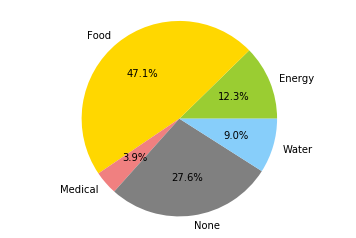


# haiti: 1597
# haiti test: 400


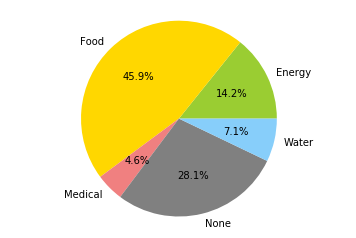

In [99]:
# Let's take a look at the data distribution

print('# sandy:', len(sandy_tweets))
print('# sandy test:', len(sandy_test_tweets))
lib.class_pie_chart(tweets)

print()

print('# haiti:', len(haiti_tweets))
print('# haiti test:', len(haiti_test_tweets))
lib.class_pie_chart(test_tweets)


## Re-run the classifier and get evaluation score

This notebook uses our implementation of the Naive Bayes classifier, but it's very similar to what you implemented yesterday. If you're interested in the details, take a look at the `learn_nb` and `classify_nb` functions in `lib.py` in the `AI4ALL2018` directory.

For this exercise, let's use the Sandy dataset.

In [131]:
# tweets, test_tweets = lib.read_data()
tweets, test_tweets = sandy_tweets, sandy_test_tweets
prior_probs, token_probs = lib.learn_nb(tweets)
predictions = [(tweet, lib.classify_nb(tweet, prior_probs, token_probs)) for tweet in test_tweets]
labels, precisions, recalls, f1s = lib.evaluate(predictions, has_return=True)

Energy
Precision:  60.0
Recall:  67.5
F1:  63.529411764705884

Food
Precision:  84.39716312056737
Recall:  92.24806201550388
F1:  88.14814814814815

Medical
Precision:  75.0
Recall:  46.15384615384615
F1:  57.14285714285714

None
Precision:  82.66666666666667
Recall:  78.48101265822785
F1:  80.51948051948052

Water
Precision:  83.33333333333333
Recall:  50.0
F1:  62.5

Average F1:  70.36797951503834


## Inspecting the Classifier

After implementing and training a classifier, you often want to inspect what kind of things it has learned and how it is making predictions on individual examples. This can help you make sure that you implemented everything correctly and it might give you ideas on how to further improve the classifier.

### Most discriminative words

Let's first look again at the most discriminative words for each category, i.e. the words that maximize P(category|word), for each category.

In [101]:
lib.most_discriminative(tweets, token_probs, prior_probs)

MOST DISCRIMINATIVE TOKENS: 

TOKEN                P(Energy|token)
b'dark'              0.8029
b'powers'            0.8029
b'generator'         0.7654
b'batteries'         0.7559
b'class'             0.7534
b'sandysucks'        0.7534
b'flashlights'       0.7345
b'masks'             0.7334
b'11/3'              0.6736
b'***********************' 0.6707

TOKEN                P(Food|token)
b'canned'            0.9784
b'non-perishable'    0.9767
b'serve'             0.9663
b'perishable'        0.9562
b'cook'              0.9511
b'sandwiches'        0.9489
b'soup'              0.9489
b'thanksgiving'      0.9441
b'rice'              0.9441
b'pasta'             0.9383

TOKEN                P(Medical|token)
b'meds'              0.8229
b'aid'               0.8008
b'ointment'          0.7360
b'prescription'      0.7360
b'ups'               0.7360
b'medications'       0.7360
b'4t-5t'             0.7360
b'medicine'          0.7360
b'pull'              0.6596
b'kits'              0.6596

TOKEN      

These five lists show you which words are most predictive of the five categories. For example, the word _bottled_ is a very strong indicator that the tweet is about water or the word _canned_ is a very strong indicator that the tweet is about food.

Many of you used several of these words in your rule-based classifiers in week 1. It's reassuring (and exciting!) to see that the Naive Bayes classifier learned that these words are good indicators of the categories as well.


### Confusion matrix

Another useful type of visualization is a so-called confusion matrix. A confusion matrix shows you for each true category _c_ how many of the tweets in _c_ were classified into the five different categories. (In this way it tells you which categories are "confused" for others by the classifier).

,Energy,Food,Medical,None,Water
Energy,31,5,0,4,0
Food,4,117,1,6,1
Medical,3,4,6,0,0
None,18,3,1,57,0
Water,1,8,0,1,10


array([[198,  32,   0,  25,   0],
       [  7, 232,   1,  11,   1],
       [ 59,  78, 118,   0,   0],
       [ 58,   9,   3, 184,   0],
       [ 12, 102,   0,  12, 128]], dtype=int32)

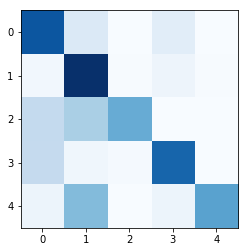

In [102]:
lib.show_confusion_matrix(predictions)

In the matrix, the **rows** correspond to the **true category** and the **columns** correspond to the **predicted category**.

For example, this matrix shows you that of all the 79 tweets in the category _None_, 13 were incorrectly classified as _Energy_, 3 as _Food_, and 1 as _Medical_. 62 of them were actually correctly classified as _None_.

### Visualizing individual tweets

It can also be really useful to visualize the probabilities of each token in an individual tweet. This can help you understand why a classifier made a correct or wrong prediction. We've implemented a visualization for you so that you can use to inspect how the classifier works on individual tweets.

In [103]:
# The following code visualizes a random tweet from the test data. 
# Hover your mouse over the words!

random_tweet = random.choice(test_tweets)
lib.visualize_tweet(random_tweet, prior_probs, token_probs)

The color of each word tells you for which category $P(\text{token} \mid \text{category})$ is the highest. When you move the mouse over a word, it shows you the actual values of $P(\text{token} \mid \text{category})$ for each category that the classifier uses to make its predictions.

You can also have the classifier make a prediction on your own tweets. Change the text in `my_tweet` below and run the cell below to see what the classifier would predict.

In [104]:
my_tweet = "I urgently need some bottled water."

lib.visualize_tweet(lib.Tweet(my_tweet, "?", ""), prior_probs, token_probs)

## More plots
Next let's generate some plots to better understand our data and to create some material for our presentation ;)

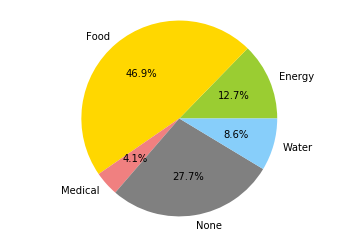

In [105]:
# Generate a pie chart for class distribution
sandy_tweets = tweets+test_tweets
lib.class_pie_chart(sandy_tweets)

Q: what can you say about our class distribution?

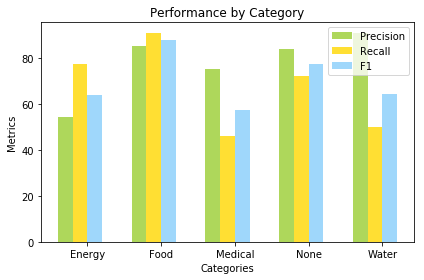

In [106]:
# Draw a pie chart for performance metrics: precision, recall, f1
lib.metric_bar_chart(labels, precisions, recalls, f1s)

## Using historical data

A lot of the times, the most effective way to improve a machine learning system is to get more data, which can often be difficult or even infeasible.  
Fortunately for us though, since Hurricane Sandy happens two years later than the Haiti earthquake, we can use the data from the Haiti earthquake to improve the performance on Hurricane Sandy. Let's try it out:

In [132]:
# Sandy alone
sandy_tweets, sandy_test_tweets = lib.read_data()
tweets = sandy_tweets
test_tweets = sandy_test_tweets
prior_probs, token_probs = lib.learn_nb(tweets)
predictions = [(tweet, lib.classify_nb(tweet, prior_probs, token_probs)) for tweet in test_tweets]
_, _, _, sandy_f1s = lib.evaluate(predictions, has_return=True)
print()

# Augment the training set with historical data from Haiti
tweets = haiti_tweets + haiti_test_tweets + sandy_tweets
# tweets = [tweet for tweet in haiti_tweets if tweet.category in ['Energy', 'Medical', 'Water']] + [tweet for tweet in haiti_test_tweets if tweet.category in ['Energy', 'Medical', 'Water']] + sandy_tweets
test_tweets = sandy_test_tweets
prior_probs, token_probs = lib.learn_nb(tweets)
predictions = [(tweet, lib.classify_nb(tweet, prior_probs, token_probs)) for tweet in test_tweets]
_, _, _, combined_f1s = lib.evaluate(predictions, has_return=True)
print()

print("Comparing the performance in the two cases:")
labels = ['Energy', 'Food', 'Medical', 'None', 'Water']
acc_f1_alone = 0
acc_f1_combined = 0
for (label, alone, combined) in zip(labels, sandy_f1s, combined_f1s):
    print('    {}: alone:{} / combined:{}'.format(label, alone, combined))
    acc_f1_alone += alone
    acc_f1_combined += combined
print('Avg: alone:{} / combined:{}'.format(acc_f1_alone/5, acc_f1_combined/5))

Energy
Precision:  60.0
Recall:  67.5
F1:  63.529411764705884

Food
Precision:  84.39716312056737
Recall:  92.24806201550388
F1:  88.14814814814815

Medical
Precision:  75.0
Recall:  46.15384615384615
F1:  57.14285714285714

None
Precision:  82.66666666666667
Recall:  78.48101265822785
F1:  80.51948051948052

Water
Precision:  83.33333333333333
Recall:  50.0
F1:  62.5

Average F1:  70.36797951503834

Energy
Precision:  35.35353535353536
Recall:  87.5
F1:  50.35971223021583

Food
Precision:  89.25619834710744
Recall:  83.72093023255815
F1:  86.4

Medical
Precision:  100.0
Recall:  61.53846153846154
F1:  76.19047619047619

None
Precision:  94.11764705882354
Recall:  40.50632911392405
F1:  56.63716814159293

Water
Precision:  73.6842105263158
Recall:  70.0
F1:  71.79487179487181

Average F1:  68.27644567143136

Comparing the performance in the two cases:
    Energy: alone:63.529411764705884 / combined:50.35971223021583
    Food: alone:88.14814814814815 / combined:86.4
    Medical: alone:5

Q: Does adding more data help with the performance? Why or why not?

Let's try another way of adding in historical data.

In [134]:
# Sandy alone
sandy_tweets, sandy_test_tweets = lib.read_data()
tweets = sandy_tweets
test_tweets = sandy_test_tweets
prior_probs, token_probs = lib.learn_nb(tweets)
predictions = [(tweet, lib.classify_nb(tweet, prior_probs, token_probs)) for tweet in test_tweets]
_, _, _, sandy_f1s = lib.evaluate(predictions, has_return=True)
print()

# Augment the training set with historical data from Haiti
# following the category distribution in Sandy

import random

haiti_tweets, haiti_test_tweets = lib.read_haiti_data()
all_haiti_tweets = haiti_tweets + haiti_test_tweets


sandy_count = Counter([tweet.category for tweet in sandy_tweets])
haiti_count = Counter([tweet.category for tweet in all_haiti_tweets])

sample_size = len(all_haiti_tweets)
sandy_priors = Counter()
for category in sandy_count:
    sandy_priors[category] = sandy_count[category] / len(sandy_tweets)
    sample_size = min(sample_size, haiti_count[category] / sandy_priors[category])
sample_size = int(sample_size)

print("********************************")
print("Adding {:d} examples from Haiti".format(sample_size))
print("********************************\n")
    
    
haiti_sampled = []
for category in haiti_count:
    haiti_examples = [tweet for tweet in all_haiti_tweets if tweet.category == category]
    haiti_sampled += random.sample(haiti_examples, int(sample_size * sandy_priors[category]))
    
tweets = sandy_tweets + haiti_sampled
test_tweets = sandy_test_tweets
prior_probs, token_probs = lib.learn_nb(tweets)
predictions = [(tweet, lib.classify_nb(tweet, prior_probs, token_probs)) for tweet in test_tweets]
_, _, _, combined_f1s = lib.evaluate(predictions, has_return=True)
print()

print("Comparing the performance in the two cases:")
labels = ['Energy', 'Food', 'Medical', 'None', 'Water']
acc_f1_alone = 0
acc_f1_combined = 0
for (label, alone, combined) in zip(labels, sandy_f1s, combined_f1s):
    print('    {}: alone:{} / combined:{}'.format(label, alone, combined))
    acc_f1_alone += alone
    acc_f1_combined += combined
print('Avg: alone:{} / combined:{}'.format(acc_f1_alone/5, acc_f1_combined/5))

Energy
Precision:  60.0
Recall:  67.5
F1:  63.529411764705884

Food
Precision:  84.39716312056737
Recall:  92.24806201550388
F1:  88.14814814814815

Medical
Precision:  75.0
Recall:  46.15384615384615
F1:  57.14285714285714

None
Precision:  82.66666666666667
Recall:  78.48101265822785
F1:  80.51948051948052

Water
Precision:  83.33333333333333
Recall:  50.0
F1:  62.5

Average F1:  70.36797951503834

********************************
Adding 259 examples from Haiti
********************************

Energy
Precision:  57.4468085106383
Recall:  67.5
F1:  62.06896551724138

Food
Precision:  84.89208633093526
Recall:  91.47286821705427
F1:  88.05970149253733

Medical
Precision:  75.0
Recall:  46.15384615384615
F1:  57.14285714285714

None
Precision:  83.56164383561644
Recall:  77.21518987341773
F1:  80.26315789473684

Water
Precision:  71.42857142857143
Recall:  50.0
F1:  58.82352941176471

Average F1:  69.27164229182748

Comparing the performance in the two cases:
    Energy: alone:63.52941

## Error analysis: Figuring out remaining errors

Often, one wants to know in which scenarios a classifier makes mistakes. This can be really useful when you want to improve your classifier.

In this exercise, try to break the Naive Bayes classifier. Use the cell above and try to come up with a tweet which should be classified as _Food_ but which is assigned a different category. Once you find such a tweet, use the visualization to figure out why the classifier gets this example wrong.

Repeat this exercise for all the other categories. Based on your observations, do you have any ideas on how to further improve the classifier?
